## Clustering

## Crime Data
### Perform Clustering (Hierarchical, K-Means & DBSCAN) for the crime data and Identify the number of Clusters formed and Draw Inferences.

## 1. Import Necessary Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score

## 2. Import Data

In [2]:
crime_data=pd.read_csv('crime_data.csv')
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


## 3. Data Understanding

**Data Description:**
- Murder -- Muder rates in different places of United States
- Assualt- Assualt rate in different places of United States
- UrbanPop - urban population in different places of United States
- Rape - Rape rate in different places of United States

### Initial Analysis

In [3]:
crime_data.shape

(50, 5)

In [4]:
crime_data.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [5]:
crime_data.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [6]:
crime_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


## 4. Data Pre-Processing

In [7]:
std_scalar=StandardScaler()
crime_data_scaled=std_scalar.fit_transform(crime_data.iloc[:,1:])
crime_data_scaled

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

## 5. Data Building

### i. Using Hierarchical Clustering

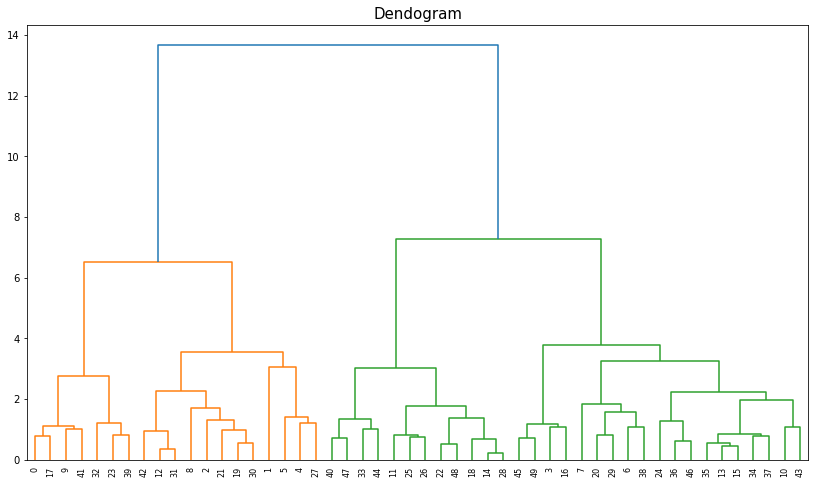

In [8]:
plt.figure(figsize=(14,8))
plt.title('Dendogram', size=15)
dendogram=sch.dendrogram(sch.linkage(crime_data_scaled, method='ward'))

Let us construct 4 clusters

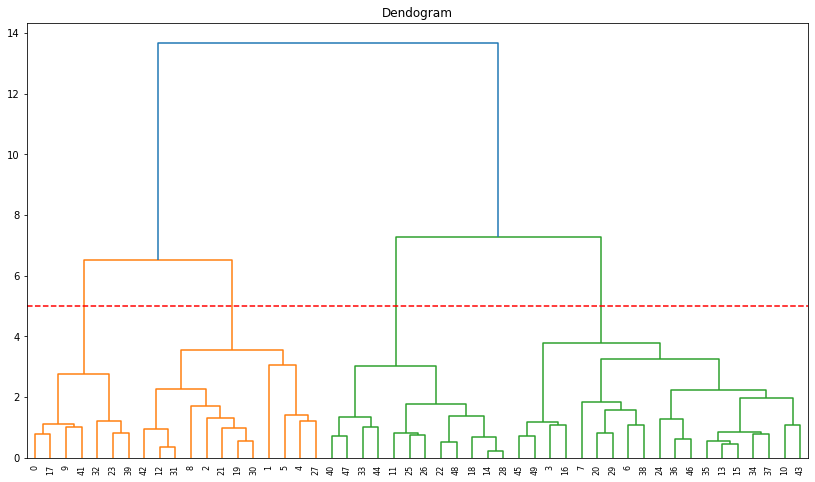

In [9]:
plt.figure(figsize=(14,8))
plt.title('Dendogram')
dendogram=sch.dendrogram(sch.linkage(crime_data_scaled, method='ward'))
plt.axhline(y=5, color='red',linestyle='--')
plt.show()

In [10]:
h_cluster=AgglomerativeClustering(n_clusters=4, linkage='ward', affinity='euclidean')

In [11]:
cluster_1=h_cluster.fit_predict(crime_data_scaled)
print(cluster_1)

[3 1 1 0 1 1 0 0 1 3 0 2 1 0 2 0 0 3 2 1 0 1 2 3 0 2 2 1 2 0 1 1 3 2 0 0 0
 0 0 3 2 3 1 0 2 0 0 2 2 0]


In [12]:
crime_data['H_Clusters']=cluster_1
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,H_Clusters
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


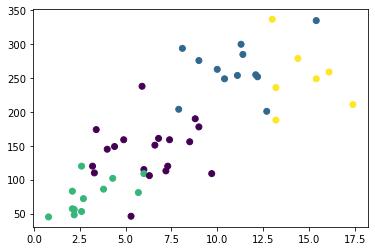

In [13]:
plt.scatter(crime_data.iloc[:,1], crime_data.iloc[:,2], c=cluster_1)
plt.show()

### ii. Using k-Means Clustering

**Let us first find out the Optimum number for 'k' by using Elbow method**

In [14]:
wcss=[]
for i in range(2,11):
    k_means=KMeans(i)
    k_means.fit(crime_data_scaled)
    wcss.append(k_means.inertia_)

In [15]:
print(wcss)

[104.96163315756873, 80.0657554011071, 57.55425863091106, 50.07656289493946, 44.47898156002558, 40.99289224361759, 37.10254001259427, 31.414696826009987, 29.29474651597238]


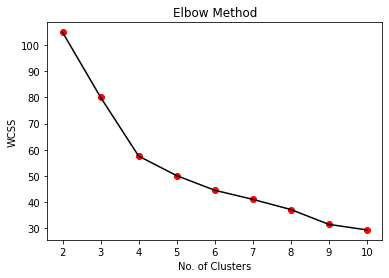

In [16]:
plt.plot(range(2,11), wcss, color='black')
plt.scatter(range(2,11), wcss, color='red')
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

By seeing the plot we can say that elbow point is at 4. Therefore k=4

In [17]:
k_means=KMeans(n_clusters=4, random_state=10)
k_means.fit(crime_data_scaled)

KMeans(n_clusters=4, random_state=10)

In [18]:
cluster_2=k_means.predict(crime_data_scaled)
print(cluster_2)

[0 1 1 0 1 1 2 2 1 0 2 3 1 2 3 2 3 0 3 1 2 1 3 0 1 3 3 1 3 2 1 1 0 3 2 2 2
 2 2 0 3 0 1 2 3 2 2 3 3 2]


In [19]:
crime_data['k-Means_Clusters']=cluster_2
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,H_Clusters,k-Means_Clusters
0,Alabama,13.2,236,58,21.2,3,0
1,Alaska,10.0,263,48,44.5,1,1
2,Arizona,8.1,294,80,31.0,1,1
3,Arkansas,8.8,190,50,19.5,0,0
4,California,9.0,276,91,40.6,1,1
5,Colorado,7.9,204,78,38.7,1,1
6,Connecticut,3.3,110,77,11.1,0,2
7,Delaware,5.9,238,72,15.8,0,2
8,Florida,15.4,335,80,31.9,1,1
9,Georgia,17.4,211,60,25.8,3,0


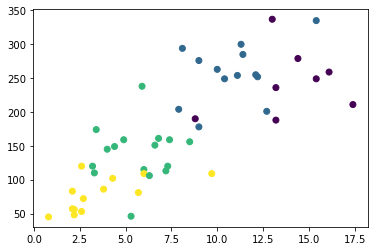

In [20]:
plt.scatter(crime_data.iloc[:,1], crime_data.iloc[:,2], c=cluster_2)
plt.show()

### iii. Using DBSCAN 

In [21]:
dbscan=DBSCAN(eps=1,min_samples=3,metric='euclidean')

In [22]:
cluster_3=dbscan.fit_predict(crime_data_scaled)
print(cluster_3)

[ 0 -1 -1 -1 -1 -1  1 -1 -1  0 -1  1  2  1  1  1  1  0  1  3  1  3  1  0
  1  1  1 -1  1  1  3  2 -1  1  1  1  1  1  1  0  1  0  2  1  1  1  1  1
  1  1]


In [23]:
crime_data['DBSCAN_Clusters']=cluster_3
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,H_Clusters,k-Means_Clusters,DBSCAN_Clusters
0,Alabama,13.2,236,58,21.2,3,0,0
1,Alaska,10.0,263,48,44.5,1,1,-1
2,Arizona,8.1,294,80,31.0,1,1,-1
3,Arkansas,8.8,190,50,19.5,0,0,-1
4,California,9.0,276,91,40.6,1,1,-1
5,Colorado,7.9,204,78,38.7,1,1,-1
6,Connecticut,3.3,110,77,11.1,0,2,1
7,Delaware,5.9,238,72,15.8,0,2,-1
8,Florida,15.4,335,80,31.9,1,1,-1
9,Georgia,17.4,211,60,25.8,3,0,0


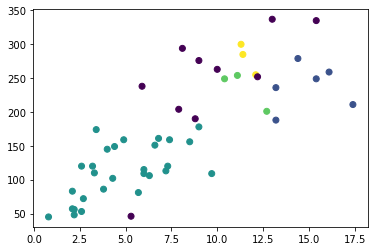

In [24]:
plt.scatter(crime_data.iloc[:,1], crime_data.iloc[:,2], c=cluster_3)
plt.show()

## Model Validation Using Silhoutte Score

**Tells us validation of consistency within clusters of data**

In [25]:
silhouette_score(crime_data_scaled, cluster_1) # Silhoutte score for Hierarchical Clustering

0.3370187183556962

In [26]:
silhouette_score(crime_data_scaled, cluster_2) # Silhoutte score for k-Means Clustering

0.33968891433344395

In [27]:
silhouette_score(crime_data_scaled, cluster_3) ## Silhoutte score for DBSCAN

0.19290975823254836

**From seeing the above silhoutte score, k-Means clustering and Hierarchical clustring are performing some good consitancy**